In [1]:
import pandas as pd

In [2]:
moist= pd.read_csv("testst.csv")

In [3]:
moist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TM      2399 non-null   float64
 1   HM      2399 non-null   float64
 2   CT      2399 non-null   object 
 3   PT      2399 non-null   float64
 4   SM      2399 non-null   float64
dtypes: float64(4), object(1)
memory usage: 93.8+ KB


In [4]:
moist["CT"].value_counts()

CT
grapes          300
rice            300
Ground Nut      200
Jute            200
maize           200
papaya          200
Tea             200
watermelon      200
wheat           200
Kidney Beans    100
millet          100
Pigeon Peas     100
muskmelon        99
Name: count, dtype: int64

In [5]:
moisture = moist.copy()
moisture.replace({'CT':{'grapes':0,'rice':1, 'Ground Nut':2,'Jute':3,'maize':4,'papaya':5,'Tea':6,'watermelon':7,'wheat':8,'Kidney Beans':9,'millet':10,'Pigeon Peas':11,'muskmelon':12}}, inplace=True)

/tmp/ipykernel_26670/293151071.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  moisture.replace({'CT':{'grapes':0,'rice':1, 'Ground Nut':2,'Jute':3,'maize':4,'papaya':5,'Tea':6,'watermelon':7,'wheat':8,'Kidney Beans':9,'millet':10,'Pigeon Peas':11,'muskmelon':12}}, inplace=True)


In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(moisture, test_size=0.2,random_state=42)
print(f"The rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

The rows in train set: 1919
Rows in test set: 480



In [7]:
train_set.count()

TM    1919
HM    1919
CT    1919
PT    1919
SM    1919
dtype: int64

In [8]:
corr_matrix = moisture.corr()
corr_matrix["SM"].sort_values(ascending=False)

SM    1.000000
HM    0.311132
PT   -0.044455
TM   -0.171287
CT   -0.778786
Name: SM, dtype: float64

In [9]:
train_set_tr = train_set.drop("SM",axis=1)
moisture_labels = train_set["SM"].copy()

array([[<Axes: xlabel='SM', ylabel='SM'>,
        <Axes: xlabel='CT', ylabel='SM'>,
        <Axes: xlabel='TM', ylabel='SM'>,
        <Axes: xlabel='HM', ylabel='SM'>],
       [<Axes: xlabel='SM', ylabel='CT'>,
        <Axes: xlabel='CT', ylabel='CT'>,
        <Axes: xlabel='TM', ylabel='CT'>,
        <Axes: xlabel='HM', ylabel='CT'>],
       [<Axes: xlabel='SM', ylabel='TM'>,
        <Axes: xlabel='CT', ylabel='TM'>,
        <Axes: xlabel='TM', ylabel='TM'>,
        <Axes: xlabel='HM', ylabel='TM'>],
       [<Axes: xlabel='SM', ylabel='HM'>,
        <Axes: xlabel='CT', ylabel='HM'>,
        <Axes: xlabel='TM', ylabel='HM'>,
        <Axes: xlabel='HM', ylabel='HM'>]], dtype=object)

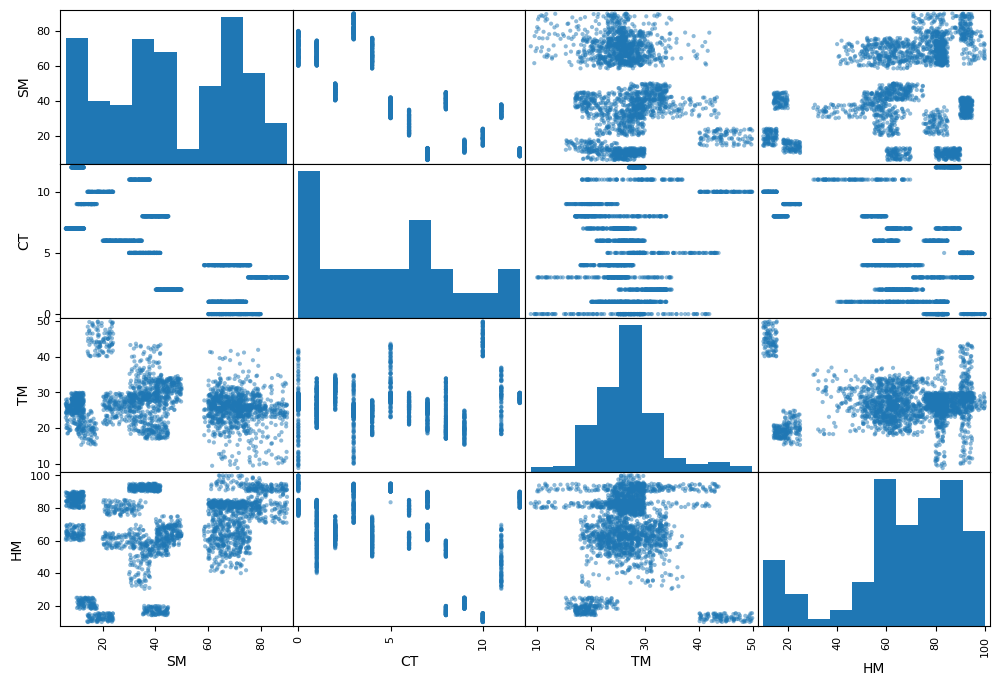

In [10]:
from pandas.plotting import scatter_matrix
attributes=["SM", "CT","TM","HM"]
scatter_matrix(moisture[attributes],figsize=(12,8))

In [11]:
moist['TM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2399 entries, 0 to 2398
Series name: TM
Non-Null Count  Dtype  
--------------  -----  
2399 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_set_tr.values,moisture_labels.values)

RandomForestRegressor()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
moisture_predictions = model.predict(train_set_tr.values)
# Checking for errors
mse =  mean_squared_error(moisture_labels,moisture_predictions)
rmse = np.sqrt(mse)

In [14]:
print(mse)
print(rmse)

2.638975900489839
1.6244925055197512


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming train_set_tr and moisture_labels are already defined

model = RandomForestRegressor()
model.fit(train_set_tr.values, moisture_labels.values)

# Predicting on the training set
y_pred_rf = model.predict(train_set_tr.values)

# Calculating regression metrics
mse_rf = mean_squared_error(moisture_labels, y_pred_rf)
mae_rf = mean_absolute_error(moisture_labels, y_pred_rf)
r2_rf = r2_score(moisture_labels, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R^2 Score: {r2_rf}")


Mean Squared Error (MSE): 2.6420212892079213
Mean Absolute Error (MAE): 1.2807562793121416
R^2 Score: 0.9954668653123939


In [16]:


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,train_set, moisture_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores= np.sqrt(-scores)

In [17]:
rmse_scores

array([0.04092717, 0.04419231, 0.0517054 , 0.0423953 , 0.04215085,
       0.03285604, 0.04434375, 0.04822946, 0.04545269, 0.04525219])

In [18]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [19]:
print_scores(rmse_scores)

Scores: [0.04092717 0.04419231 0.0517054  0.0423953  0.04215085 0.03285604
 0.04434375 0.04822946 0.04545269 0.04525219]
Mean: 0.04375051740768347
Standard deviation: 0.004691451450873783


In [20]:
from joblib import dump,load
dump(model,'new.joblib')

['new.joblib']

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd

# Assuming train_set and moisture_labels are already defined as pandas DataFrame and Series respectively

# Split the data into training and testing sets
train_set_tr, test_set, moisture_labels, test_labels = train_test_split(train_set, moisture_labels, test_size=0.2, random_state=42)

# Ensure train_set_tr and test_set have the same columns
common_columns = train_set_tr.columns.intersection(test_set.columns)
train_set_tr = train_set_tr[common_columns]
test_set = test_set[common_columns]

# Initialize the model
model = RandomForestRegressor()

# Cross-validation
cv_scores = cross_val_score(model, train_set_tr, moisture_labels, cv=5, scoring='neg_mean_squared_error')
print('Cross-validation scores (negative MSE):', cv_scores)
print('Average cross-validation score (negative MSE):', cv_scores.mean())

# Fit the model on the training data
model.fit(train_set_tr, moisture_labels)

# Predict on the test set
y_pred = model.predict(test_set)

# Evaluate the model
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Cross-validation scores (negative MSE): [-0.00350612 -0.0037145  -0.00290829 -0.00360344 -0.00657193]
Average cross-validation score (negative MSE): -0.00406085521824084
Mean Squared Error: 0.0029152757291666808
R2 Score: 0.9999952023713409


In [22]:
from joblib import dump,load
import numpy as np
model=load('new.joblib')

In [23]:
import numpy as np
input = np.array([[33.7,67.0,1,0]])
model.predict(input)

array([66.2884])

In [24]:
import pandas as pd
D= pd.read_csv("testing_dataset.csv")

In [25]:
F=D['SM'].copy

In [26]:
d=D.drop('SM',axis=1)

In [27]:
d.replace({'CT':{'grapes':0,'rice':1, 'Ground Nut':2,'Jute':3,'maize':4,'papaya':5,'Tea':6,'watermelon':7,'wheat':8,'Kidney Beans':9,'millet':10,'Pigeon Peas':11,'muskmelon':12}}, inplace=True)

/tmp/ipykernel_26670/3918520572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace({'CT':{'grapes':0,'rice':1, 'Ground Nut':2,'Jute':3,'maize':4,'papaya':5,'Tea':6,'watermelon':7,'wheat':8,'Kidney Beans':9,'millet':10,'Pigeon Peas':11,'muskmelon':12}}, inplace=True)


In [28]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = joblib.load('new.joblib')

print("The Testing Dataset head:")
print(D.head())
print()
print("Making predictions for the testing dataset head:")
print(d.head())
print("The predictions are")
print(model.predict(d.head()))

The Testing Dataset head:
          TM         HM      CT    PT     SM
0  27.754298  92.860569  grapes  0.00  79.00
1  27.311557  94.313884  grapes  0.00  72.48
2  28.842710  95.648076  grapes  2.48  78.72
3  26.614235  91.537209  grapes  0.00  67.54
4  29.701432  99.645730  grapes  0.00  72.89

Making predictions for the testing dataset head:
          TM         HM  CT    PT
0  27.754298  92.860569   0  0.00
1  27.311557  94.313884   0  0.00
2  28.842710  95.648076   0  2.48
3  26.614235  91.537209   0  0.00
4  29.701432  99.645730   0  0.00
The predictions are
[75.9596 71.9345 75.5412 68.3344 73.5248]


/home/cjaure/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [29]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = joblib.load('new.joblib')

print("The Testing Dataset:")
print(D)
print("The result set ")
print(model.predict(d))

/home/cjaure/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


The Testing Dataset:
             TM         HM      CT     PT     SM
0     27.754298  92.860569  grapes   0.00  79.00
1     27.311557  94.313884  grapes   0.00  72.48
2     28.842710  95.648076  grapes   2.48  78.72
3     26.614235  91.537209  grapes   0.00  67.54
4     29.701432  99.645730  grapes   0.00  72.89
...         ...        ...     ...    ...    ...
2394  17.341502  18.756263   wheat  35.00  41.87
2395  17.437327  14.338474   wheat   0.00  43.44
2396  18.897802  19.761829   wheat   0.00  43.10
2397  18.591908  14.779596   wheat   0.00  38.91
2398  18.315615  15.361435   wheat   4.88  44.48

[2399 rows x 5 columns]
The result set 
[75.9596 71.9345 75.5412 ... 39.7477 38.6491 42.5979]
